### Your name:

<pre> Maryam Mohseni </pre>

In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Dimesionality Reduction

Q. What is the curse of dimensionality?

-Too many features makes training extremely slow, it can also make it much harder to find a good solution. 

-High dimension makes data visualization very difficult.

-Most points in a high-dimensional hypercube are very close to the border.

-High-dimensional datasets are at risk of being very sparse: most training instances are likely to be far away from each other.

-A new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions and resulting overfitting.

Q. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

No, I think in case of a highly nonlinear dataset it is better to use Kernel PCA for dimensionality reduction. Kernel PCA first maps the original non-linear dataset from n-dim to Kernel space in inifnite-dim by kernel trick e.g rbf, then maps kernel space to low simension space (d-dim) by PCA in which the dataset is linearly separable. :)

Q. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

I think we can evaluate the performance with two metrics after feeding the reduced data set to our "model": 1. How long does it take to train the model with reduced data set compared to the timing for training with original data set. Higher time reduction would be better. 2. We evaluate the resulting model on the train set meaning finding the accuracy score for predicted values and the labels and if we do not lose much accuracy, the dimentionality reduction agorithm performed well. (For sure we lose performance as we lose information by such algorithms but should not be too much loss).

Q. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(random_state=42)

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training took 4.50s


0.9455

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
rnd_clf2 = RandomForestClassifier(random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training took 10.11s


0.8908

Unfortunately after using PCA dimension reduction algorithm, training took almost twice longer :(. Also, it reduced the accuracy score which was expected as by dimesion reduction we will use information. So, PCA is not always useful (e.g. this example). It depends on the dataset and model...

Q. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [5]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

np.random.seed(42)
m = 10000
idx = np.random.permutation(60000)[:m]
X = mnist['data'][idx]
y = mnist['target'][idx]

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


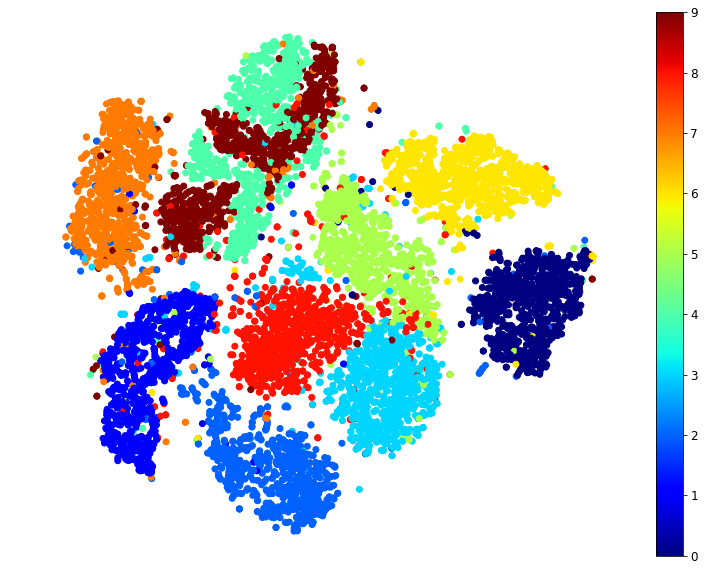

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

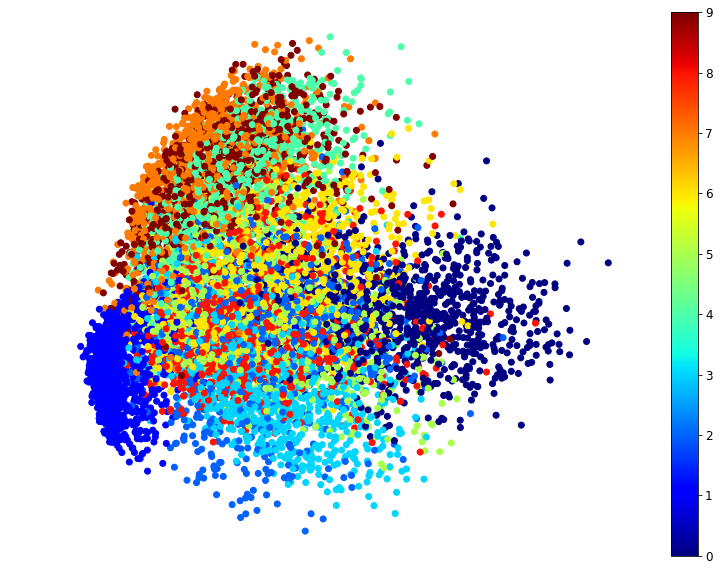

In [7]:
from sklearn.decomposition import PCA
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
plt.figure(figsize=(13,10))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

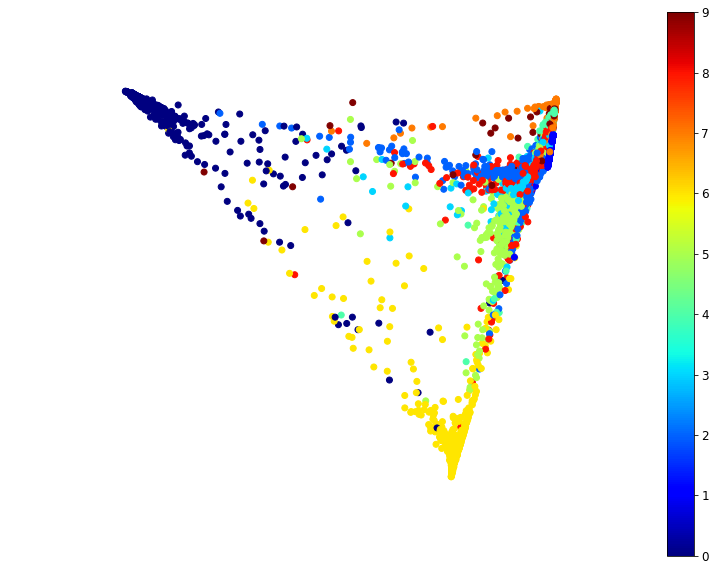

In [8]:
from sklearn.manifold import LocallyLinearEmbedding
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
plt.figure(figsize=(13,10))
plt.scatter(X_lle_reduced[:, 0], X_lle_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

First, I picked 10000 samples instead 60000 samples as dimensionality reduction is too slow on full training data set especially for TSNE compared to PCA.
The first plot for TSNE shows that some digits for emaple 0 and 6 can be separated form other numbers which shows good performance of this method.
The second plot for PCA shows this method can only cluster one digit for example 1. Overally, this method does not work well for this data set.
Last plot for LLE shows that this method is a bit better than PCA but still worse than TSNE. So TSNE is the best among these dimentionality reduction methods for MNIST data set.

NOTE: I could not use the MNIST data set directly:
"from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')"
I got time out error. So I downloaded the .mat file of MNIST and after download put the file inside ~/scikit_learn_data/mldata folder. When we have them locally scikit learn won't download it and uses that file.